<a href="https://colab.research.google.com/github/dyou-wbg/meta_processing/blob/main/0417_TrueNegatives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from google.colab import drive
import csv
import os
import re
import pandas as pd
import numpy as np

#directory = '/content/drive/MyDrive/finalMetaFile'
#df_english_titles = pd.read_csv('/content/drive/MyDrive/finalMetaFile/50k_sample.csv')


df_english_titles = pd.read_csv('/content/drive/MyDrive/10Ksample.csv')
df_english_titles.columns

Mounted at /content/drive


Index(['Unnamed: 0', 'title'], dtype='object')

In [2]:
df_english_titles = df_english_titles[~df_english_titles['title'].str.contains('و|д|я|š|ü|à|é|ś|ä|ú|의|θ|λ|ό|τ|η|τ|α|の|と', regex=True)]

In [5]:
(1-(len(df_english_titles)/10000))*100.00

0.33999999999999586

In [3]:
from string import printable
from collections import Counter

printable_dict = {c:i for i,c in enumerate(printable)}

def vectorize(title):
    cnt = Counter(title)
    array = [0 for _ in printable]+[0]
    for c,n in cnt.items():
        if c in printable_dict:
            array[printable_dict[c]]=n
        else:
            array[-1]+=n
    return np.array(array)

vects = []
for title in df_english_titles.title:
    vects.append(vectorize(title))

In [8]:
df_english_titles['vects'] = vects
df_english_titles

,Unnamed: 0,title,vects
0,26574,protection and export insurance: the identific...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 3, 4, 11,..."
1,1958,designing domestic institutions for internatio...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 3, 2, 5, ..."
2,37079,residual seasonality and monetary policy,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 1, 2, 3, ..."
3,29955,the french left and the march elections,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 1, 6, ..."
4,38078,on the record: delving more deeply into global...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 3, 6, ..."
...,...,...,...
9995,22237,"pengaruh persepsi kualitas pelayanan, pemahama...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 1, 0, 2, 10..."
9996,6564,globalisation: empowering women through inform...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 2, 2, 1, 6, ..."
9997,4370,the effect of organizational justice on the bu...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 1, 5, 1, 8,..."
9998,26142,which liquidity indicator is more informative ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 1, 4, 2, 8,..."


In [9]:
df_english_titles = df_english_titles.drop(columns=['vects'])

# Strategy to finding Negative titles

1. Drop all titles that are identified as duplicates
2. Bucketing
  - Count number of words for each title
  - Within group of same words, vectorize

In [4]:
df_english_titles=df_english_titles[~df_english_titles['title'].str.lower().isin(['sustaining fiscal policy through immigration1'
,'sustaining fiscal policy through immigration'
,'voluntary environmental agreements in developing countries: the colombian experience'
,'work and employment'
,'the role of social grants on commercialization among smallholder farmers in south africa: evidence from a continuous treatment approach'
,'voluntary environmental agreements in developing countries: the colombian experience'
,'the role of social grants on commercialization among smallholder farmers in south africa: evidence from a continuous treatment approach'
,'sustaining fiscal policy through immigration'
,'sustaining fiscal policy through immigration1'
,'work and employment'])]

In [5]:
len(df_english_titles)

9958

In [6]:

df_english_titles.to_csv('/content/drive/MyDrive/10Ksample_excludeDuplicates.csv')

In [ ]:
threshold = 2
min_length = 15

candidate_titles = []  # List to store titles with L1 > threshold and minimum length

for i, v1 in enumerate(vects):
  if sum(v1[:-1]) > min_length:  # Only above a minimum number of printable characters
    for j, v2 in enumerate(vects):
      if sum(v2[:-1]) > min_length and i != j:
        l1 = np.linalg.norm((v1[:-1] - v2[:-1]), ord=1)
        if l1 > threshold:
          t1 = df_english_titles.iloc[i].title
          candidate_titles.append(t1)


In [8]:
df_english_titles.columns

Index(['Unnamed: 0', 'title'], dtype='object')

In [9]:
def count_words(title):
  words = title.split()
  return len(words)

df_english_titles['word_count'] = df_english_titles['title'].apply(count_words)


In [12]:
vects_2 = []
for title in df_english_titles.title:
    vects_2.append(vectorize(title))

df_english_titles['vects_2'] = vects_2[:len(df_english_titles)]

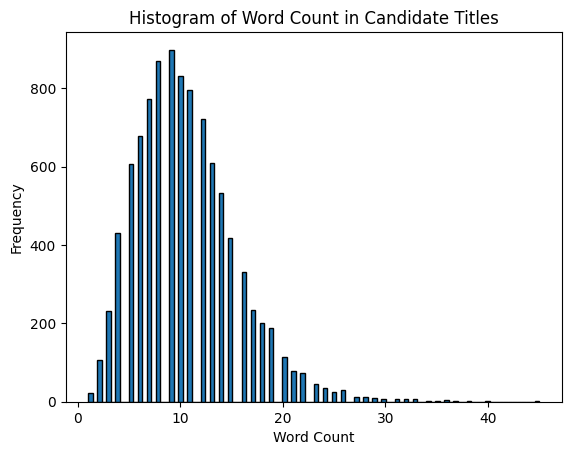

In [15]:

import matplotlib.pyplot as plt

plt.hist(df_english_titles['word_count'], bins=100, edgecolor='black')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Count in Candidate Titles')
plt.show()


In [17]:

def sum_array(array):
  sum = 0
  for element in array:
    sum += element
  return sum

df_english_titles['sum_array'] = df_english_titles['vects_2'].apply(sum_array)
df_english_titles = df_english_titles.sort_values(by=[ 'word_count','sum_array'], ascending=True)
df_english_titles.head(100)

,Unnamed: 0,title,word_count,vects_2,sum_array
718,9182,notes,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",5
3472,11292,polen,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",5
4679,5273,index,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ...",5
6961,39460,imogine,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...",7
7387,10502,berwick,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, ...",7
...,...,...,...,...,...
7254,3127,callistemon formosus,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, ...",20
9965,3558,preference reversals,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 6, ...",20
1911,18653,critical negotiations,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1, ...",21
3828,16824,age-earnings profiles,2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, ...",21


In [29]:

df_ct=pd.DataFrame(pd.crosstab(df_english_titles['word_count'], df_english_titles['sum_array']))
df_ct.head()

sum_array,5,7,8,9,10,11,12,13,14,15,...,243,244,246,250,251,255,264,266,281,300
word_count,,,,,,,,,,,,,,,,,,,,,
1,3,2,2,0,5,4,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,3,3,5,5,7,8,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,3,2,5,11,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
df_ct = df_ct.replace(0, np.nan)
df_ct.head()

sum_array,5,7,8,9,10,11,12,13,14,15,...,243,244,246,250,251,255,264,266,281,300
word_count,,,,,,,,,,,,,,,,,,,,,
1,3.0,2.0,2.0,NaN,5.0,4.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2.0,3.0,3.0,5.0,5.0,7.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1.0,1.0,3.0,2.0,5.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_ct.head(20)

sum_array,5,7,8,9,10,11,12,13,14,15,...,243,244,246,250,251,255,264,266,281,300
word_count,,,,,,,,,,,,,,,,,,,,,
1,3.0,2.0,2.0,NaN,5.0,4.0,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2.0,3.0,3.0,5.0,5.0,7.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1.0,1.0,3.0,2.0,5.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:

import numpy as np

word_count = 15
sum_array_values = []

for i in df_ct.index:
    if i == word_count:
        for j in range(len(df_ct.columns)):
            if df_ct.iloc[i, j] >= 1:
                sum_array_values.append(df_ct.columns[j])

result = np.array(sum_array_values)
print(result)


[ 67  74  82  84  85  86  88  89  90  91  92  93  94  95  96  97  98  99
 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 132 133 134 135 136
 137 138 140 142 143 149 153]


In [35]:
df_english_titles[(df_english_titles['word_count'] == 15) & (df_english_titles['sum_array'] == 5)]['title']

718     notes
3472    polen
4679    index
Name: title, dtype: object

In [36]:
df_english_titles[(df_english_titles['word_count'] == 1) & (df_english_titles['sum_array'] == 7)]['title']

6961    imogine
7387    berwick
Name: title, dtype: object

In [34]:
for i in range(df_ct.shape[0]):
  for j in range(df_ct.shape[1]):
    if not pd.isna(df_ct.iloc[i, j]):
      matching_titles = df_english_titles[(df_english_titles['word_count'] == i) & (df_english_titles['sum_array'] == j)]['title'].tolist()
      for title in matching_titles:
        print(title)


Streaming output truncated to the last 5000 lines.
poverty dynamics: measurement and understanding from an interdisciplinary perspective
special statistics-37: finances of state governments: deteriorating fiscal management
industrial policy implementation: empirical evidence from china’s shipbuilding industry
consumers' perceptions of corporate social responsibilities: a cross-cultural comparison
transitional justice and reconciliation from the international peace-building perspective
legal problems concerning state-owned enterprises in international investment arbitration
1999 macromarketing seminar abstracts: macromarketing and twenty-first century challenges
meningkatkan kemampuan berpikir kreatif menggunakan model pembelajaran discovery learning
âwealth creation through corporate diversification â the bondholdersâ perspectiveâ
exchange-rate determination and optimal economic-policy under various exchange-rate regimes
corporate social responsibility and financial performance

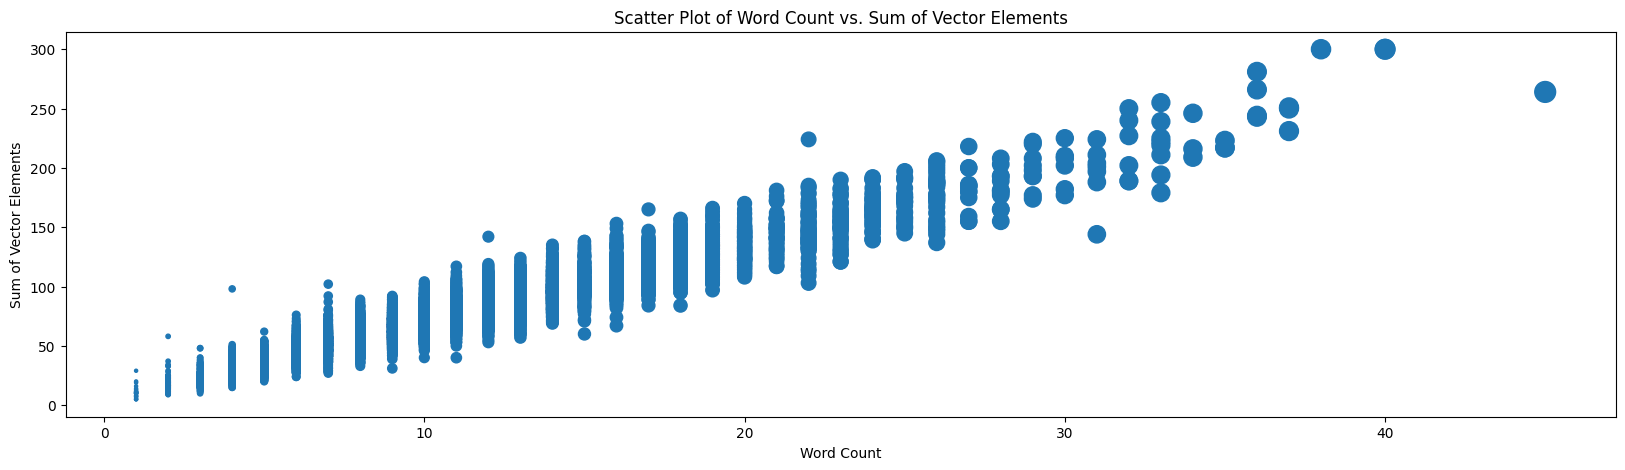

In [22]:

plt.figure(figsize=(20, 5))
plt.scatter(df_english_titles['word_count'], df_english_titles['sum_array'], s=df_english_titles['word_count']*5)

# Add labels and title
plt.xlabel('Word Count')
plt.ylabel('Sum of Vector Elements')
plt.title('Scatter Plot of Word Count vs. Sum of Vector Elements')

# Show the plot
plt.show()


In [65]:
len(df_english_titles)

9958

In [69]:

duplicate_titles = df_english_titles[df_english_titles.duplicated(subset='title', keep=False)]['title'].tolist()
duplicate_titles

['discussion', 'discussion', 'discussion', 'book reviews', 'book reviews']